# Lib

In [121]:
import os 
import pandas as pd
import numpy as np
import datetime as dt

from lifelines import KaplanMeierFitter

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load data

In [122]:
fname_schema = "SCHEMA_21JAN2021_31AUG2021.parquet"
obito_pares = "PAREADOS_COM_INTERVALOS_OBITO_1.parquet"
hospital_pares = "PAREADOS_COM_INTERVALOS_HOSPITAL_1.parquet"
surv_obito = "SURVIVAL_CORONAVAC_D1D2_OBITO_1.parquet"
surv_hospital = "SURVIVAL_CORONAVAC_D1D2_HOSPITAL_1.parquet"

vaccine = "CORONAVAC"
data_folder = os.path.join("..", "output", "data")
pareado_folder = os.path.join("..", "output", "PAREAMENTO", vaccine)

fschema = pd.read_parquet(os.path.join(data_folder, fname_schema))

In [123]:
obito_df = pd.read_parquet(os.path.join(pareado_folder, obito_pares))
hospital_df = pd.read_parquet(os.path.join(pareado_folder, hospital_pares))
s_obito = pd.read_parquet(os.path.join(pareado_folder, "SURVIVAL", surv_obito))
s_hospital = pd.read_parquet(os.path.join(pareado_folder, "SURVIVAL", surv_hospital))

In [124]:
cond_d1 = (hospital_df["CASO D1 CENSURADO"]==False) | (hospital_df["CONTROLE D1 CENSURADO"]==False)
hospital_df[cond_d1][:8]

,CPF,DATA D1,DATA D2,DATA OBITO COVID,DATA OBITO GERAL,DATA HOSPITALIZACAO,TIPO,PAR,CASO D1 INTERVALO,CASO D1 CENSURADO,CASO D2 INTERVALO,CASO D2 CENSURADO,CONTROLE D1 INTERVALO,CONTROLE D1 CENSURADO,CONTROLE D2 INTERVALO,CONTROLE D2 CENSURADO
24,21459789334,2021-01-22,2021-03-25,NaT,NaT,2021-02-22,CASO,35693797368,31.0,False,NaN,False,62.0,True,NaN,True
56,06865860349,2021-01-22,2021-03-03,NaT,NaT,2021-01-31,CASO,61364661390,9.0,False,NaN,False,40.0,True,NaN,True
282,10496580353,2021-01-24,2021-03-07,NaT,NaT,NaT,CASO,45522146320,42.0,True,NaN,True,30.0,False,NaN,False
362,12313017320,2021-01-24,2021-03-17,NaT,NaT,2021-02-18,CASO,38168251334,25.0,False,NaN,False,52.0,True,NaN,True
724,19104073304,2021-01-25,2021-03-14,NaT,NaT,2021-02-23,CASO,22627820168,29.0,False,NaN,False,48.0,True,NaN,True
1974,11273747372,2021-01-29,2021-04-03,NaT,NaT,2021-02-15,CASO,80836755391,17.0,False,NaN,False,64.0,True,NaN,True
2618,05818567320,2021-02-01,2021-02-28,NaT,NaT,NaT,CASO,19482973020,NaN,True,NaN,True,NaN,False,NaN,False
2830,16449266368,2021-02-01,2021-02-22,NaT,NaT,NaT,CASO,08836752349,21.0,True,NaN,True,13.0,False,NaN,False


In [126]:
cond_d1 = (obito_df["CASO D1 CENSURADO"]==False) | (obito_df["CONTROLE D1 CENSURADO"]==False)
obito_df[cond_d1][8:16]

,CPF,DATA D1,DATA D2,DATA OBITO COVID,DATA OBITO GERAL,DATA HOSPITALIZACAO,TIPO,PAR,CASO D1 INTERVALO,CASO D1 CENSURADO,CASO D2 INTERVALO,CASO D2 CENSURADO,CONTROLE D1 INTERVALO,CONTROLE D1 CENSURADO,CONTROLE D2 INTERVALO,CONTROLE D2 CENSURADO
60662,01869450353,2021-03-22,2021-11-12,NaT,NaT,NaT,CASO,01576879372,162.0,True,NaN,True,39.0,False,NaN,False
61654,23225823368,2021-03-22,NaT,2021-04-09,NaT,2021-03-31,CASO,02290995304,18.0,False,NaN,None,162.0,True,NaN,None
62070,54653860378,2021-03-22,2021-04-21,NaT,NaT,NaT,CASO,19072066391,30.0,True,NaN,True,19.0,False,NaN,False
62850,01664069372,2021-03-22,2021-04-04,NaT,NaT,NaT,CASO,31434428320,13.0,True,NaN,True,10.0,False,NaN,False
63880,09057285304,2021-03-22,2021-04-02,NaT,NaT,NaT,CASO,02467577368,11.0,True,NaN,True,5.0,False,NaN,False
64700,06060625304,2021-03-22,2021-04-16,NaT,NaT,NaT,CASO,12914454805,25.0,True,NaN,True,9.0,False,NaN,False
65540,01045210315,2021-03-22,2021-04-08,NaT,NaT,NaT,CASO,16856481349,17.0,True,NaN,True,4.0,False,NaN,False
67542,01561804304,2021-03-22,NaT,2021-04-15,NaT,2021-04-07,CASO,21000050149,24.0,False,NaN,None,162.0,True,NaN,None


In [69]:
s_obito[:5]

,CPF,TIPO,t - D1 OBITO,E - D1 OBITO,t - D2 OBITO,E - D2 OBITO
0,13933680344,CASO,24,False,47.0,False
1,06840492362,CONTROLE,24,False,47.0,False
2,16650700304,CASO,24,False,198.0,False
3,16214153334,CONTROLE,24,False,198.0,False
4,10965394387,CASO,24,False,198.0,False


In [70]:
s_hospital[:5]

,CPF,TIPO,t - D1 HOSPITAL,E - D1 HOSPITAL,t - D2 HOSPITAL,E - D2 HOSPITAL
0,13933680344,CASO,24,False,47.0,False
1,06840492362,CONTROLE,24,False,47.0,False
2,16650700304,CASO,24,False,198.0,False
3,16214153334,CONTROLE,24,False,198.0,False
4,10965394387,CASO,24,False,198.0,False


## Lifelines tests

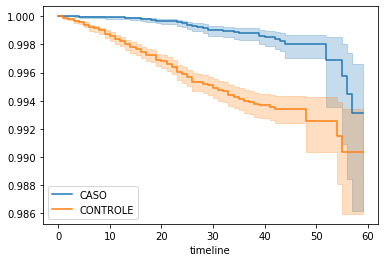

In [127]:
fig, ax = plt.subplots(1)
# Obito D1
# --> Caso
caso_cond = (s_obito["TIPO"]=="CASO") & (s_obito["t - D1 OBITO"]>=0)
obito_caso = s_obito[caso_cond]
kmf_d1 = KaplanMeierFitter()
kmf_d1.fit(obito_caso["t - D1 OBITO"], event_observed=obito_caso["E - D1 OBITO"], label="CASO", timeline=range(0,60,1))
ax = kmf_d1.plot_survival_function()
# --> Controle
controle_cond = (s_obito["TIPO"]=="CONTROLE") & (s_obito["t - D1 OBITO"]>=0)
obito_controle = s_obito[controle_cond]
kmf_d1.fit(obito_controle["t - D1 OBITO"], event_observed=obito_controle["E - D1 OBITO"], label="CONTROLE", timeline=range(0,60,1))
ax = kmf_d1.plot_survival_function(ax=ax)
#ax.set_ylim([0.98,1])

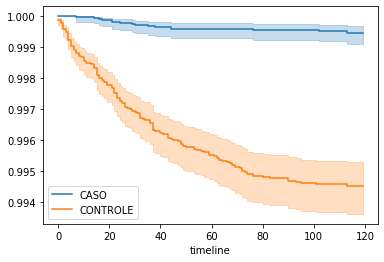

In [128]:
fig, ax = plt.subplots(1)
# Obito D2
obitod2 = s_obito[pd.notna(s_obito["t - D2 OBITO"])]
# --> Caso
caso_cond = (obitod2["TIPO"]=="CASO") & (obitod2["t - D2 OBITO"]>=0)
obito_caso = obitod2[caso_cond]
kmf_d2 = KaplanMeierFitter()
kmf_d2.fit(obito_caso["t - D2 OBITO"], event_observed=obito_caso["E - D2 OBITO"], label="CASO", timeline=range(0,120,1))
ax = kmf_d2.plot_survival_function()
# --> Controle
controle_cond = (obitod2["TIPO"]=="CONTROLE") & (obitod2["t - D2 OBITO"]>=0)
obito_controle = obitod2[controle_cond]
kmf_d2.fit(obito_controle["t - D2 OBITO"], event_observed=obito_controle["E - D2 OBITO"], label="CONTROLE", timeline=range(0,120,1))
ax = kmf_d2.plot_survival_function(ax=ax)
#ax.set_ylim([0.9,1])

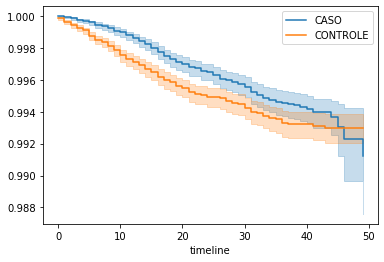

In [129]:
fig, ax = plt.subplots(1)
# Hospital D1
# --> Caso
caso_cond = (s_hospital["TIPO"]=="CASO") & (s_hospital["t - D1 HOSPITAL"]>=0)
hospital_caso = s_hospital[caso_cond]
kmf_d1 = KaplanMeierFitter()
kmf_d1.fit(hospital_caso["t - D1 HOSPITAL"], event_observed=hospital_caso["E - D1 HOSPITAL"], label="CASO", timeline=range(0,50,1))
ax = kmf_d1.plot_survival_function()
# --> Controle
controle_cond = (s_hospital["TIPO"]=="CONTROLE") & (s_hospital["t - D1 HOSPITAL"]>=0)
hospital_controle = s_hospital[controle_cond]
kmf_d1.fit(hospital_controle["t - D1 HOSPITAL"], event_observed=hospital_controle["E - D1 HOSPITAL"], label="CONTROLE", timeline=range(0,50,1))
ax = kmf_d1.plot_survival_function(ax=ax)
#ax.set_ylim([0.98,1])

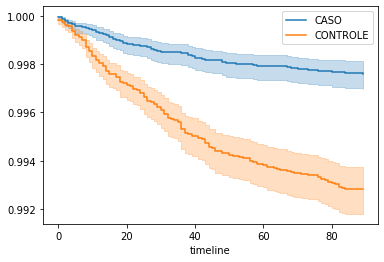

In [166]:
fig, ax = plt.subplots(1)
# Hospital D2
# --> Caso
caso_cond = (s_hospital["TIPO"]=="CASO") & (s_hospital["t - D2 HOSPITAL"]>=0)
hospital_caso = s_hospital[caso_cond]
kmf_d1 = KaplanMeierFitter()
kmf_d1.fit(hospital_caso["t - D2 HOSPITAL"], event_observed=hospital_caso["E - D2 HOSPITAL"], label="CASO", timeline=range(0,90,1))
ax = kmf_d1.plot_survival_function()
# --> Controle
controle_cond = (s_hospital["TIPO"]=="CONTROLE") & (s_hospital["t - D2 HOSPITAL"]>=0)
hospital_controle = s_hospital[controle_cond]
kmf_d1.fit(hospital_controle["t - D2 HOSPITAL"], event_observed=hospital_controle["E - D2 HOSPITAL"], label="CONTROLE", timeline=range(0,90,1))
ax = kmf_d1.plot_survival_function(ax=ax)


In [167]:
#s_hospital[s_hospital["t - D1 HOSPITAL"]>=0]

In [163]:
cs = kmf_d1c.survival_function_
ct = kmf_d1ct.survival_function_

In [164]:
(1-(1 - cs["CASO"])/(1 - ct["CONTROLE"]))[10:30]

timeline
10.0    0.652551
11.0    0.632296
12.0    0.644850
13.0    0.636682
14.0    0.652337
15.0    0.631899
16.0    0.598562
17.0    0.601148
18.0    0.622043
19.0    0.591606
20.0    0.594157
21.0    0.598736
22.0    0.605295
23.0    0.609534
24.0    0.615437
25.0    0.635024
26.0    0.629735
27.0    0.617510
28.0    0.615267
29.0    0.616739
30.0    0.621600
dtype: float64

In [170]:
s_obito

,CPF,TIPO,t - D1 OBITO,E - D1 OBITO,t - D2 OBITO,E - D2 OBITO
0,13933680344,CASO,24.0,False,47.0,False
1,06840492362,CONTROLE,24.0,False,47.0,False
2,16650700304,CASO,24.0,False,198.0,False
3,16214153334,CONTROLE,24.0,False,198.0,False
4,10965394387,CASO,24.0,False,198.0,False
...,...,...,...,...,...,...
249331,23428198387,CONTROLE,0.0,False,NaN,False
249332,17427690397,CASO,0.0,False,NaN,False
249333,03376411379,CONTROLE,0.0,False,NaN,False
249334,31823572391,CASO,0.0,False,NaN,False


In [173]:
s_obito_ = s_obito.merge(fschema[["SEXO", "IDADE", "CPF", "BAIRRO"]], on="CPF", how="left")

In [174]:
s_obito_

,CPF,TIPO,t - D1 OBITO,E - D1 OBITO,t - D2 OBITO,E - D2 OBITO,SEXO,IDADE,BAIRRO
0,13933680344,CASO,24.0,False,47.0,False,F,65,LAGOA REDONDA
1,06840492362,CONTROLE,24.0,False,47.0,False,F,64,MONDUBIM
2,16650700304,CASO,24.0,False,198.0,False,F,60,NÃO INFOMRADO
3,16214153334,CONTROLE,24.0,False,198.0,False,F,60,CIDADE DOS FUNCIONARIOS
4,10965394387,CASO,24.0,False,198.0,False,F,69,ENGENHEIRO LUCIANO CAVALCANTE
...,...,...,...,...,...,...,...,...,...
249331,23428198387,CONTROLE,0.0,False,NaN,False,M,60,GRANJA LISBOA
249332,17427690397,CASO,0.0,False,NaN,False,M,61,PARQUE SANTA ROSA
249333,03376411379,CONTROLE,0.0,False,NaN,False,M,60,PRAIA DO FUTURO I
249334,31823572391,CASO,0.0,False,NaN,False,M,61,MONTESE


In [175]:
cpfl = s_obito_["CPF"].tolist()
tipo = s_obito_["TIPO"].tolist()

f = dict()
for j in range(0, s_obito_.shape[0],2):
    f.update({cpfl[j]: cpfl[j+1]})